In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [7]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [8]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

In [9]:
df['population_per_household'] = df['population'] / df['households']

#1. What is the most frequent observation (mode) for the column ocean_proximity?

In [10]:
df.ocean_proximity.mode()

0    <1H OCEAN
dtype: object

#2

- Create the correlation matrix for the numerical features of your train dataset.
 - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

In [11]:
numeric = df.copy()
numeric = df.drop(['ocean_proximity', 'median_house_value'], axis=1)
numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,5.429000,0.213794,3.070655
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,2.474173,0.065248,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.846154,0.037151,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,4.440716,0.175225,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,5.229129,0.203159,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,6.052381,0.240126,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,2.824675,1243.333333


In [13]:
numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.027540,0.081205,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,0.106389,-0.098619,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,-0.153277,0.135622,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.133798,-0.187381,-0.024581
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.001765,0.071649,-0.028325
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.072213,0.010035,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,-0.080598,0.034498,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.326895,-0.545298,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001765,-0.072213,-0.080598,0.326895,1.000000,-0.370308,-0.004852
bedrooms_per_room,0.081205,-0.098619,0.135622,-0.187381,0.071649,0.010035,0.034498,-0.545298,-0.370308,1.000000,0.002601


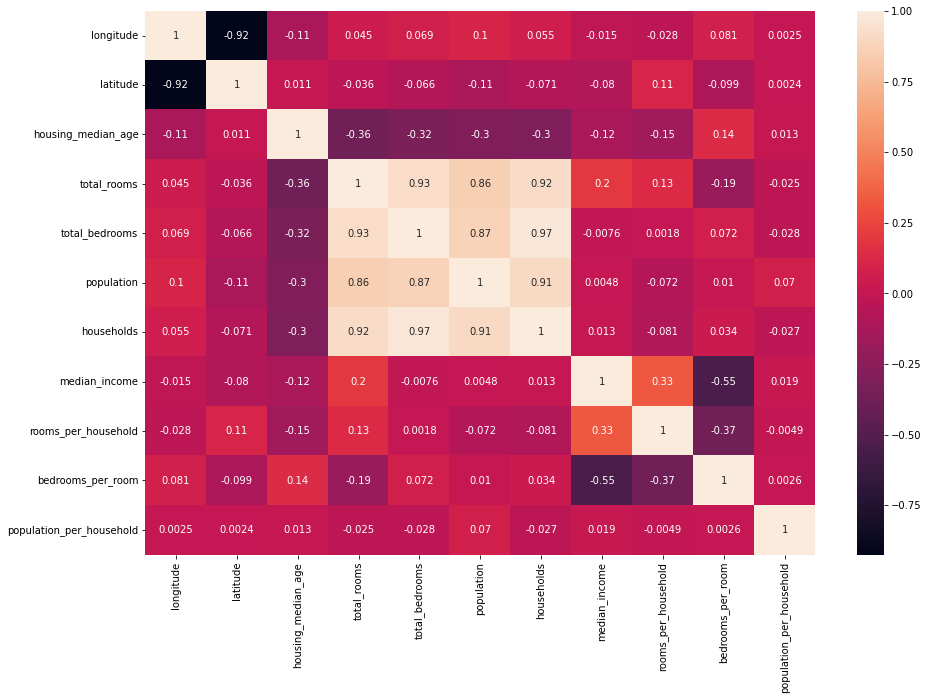

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric.corr(), annot=True)
plt.show()

In [15]:
numeric.corr().unstack().sort_values(ascending=False)[:15]

longitude                 longitude                   1.000000
latitude                  latitude                    1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_income             median_income               1.000000
households                households                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population                population                  1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.974366
households                total_bedrooms              0.974366
total_bedrooms            total_rooms                 0.927058
total_rooms               total_bedrooms              0.927058
dtype: float64

Answer for Q2 is total_bedrooms vs households

In [16]:
df_class = df.copy()

In [18]:
mean = df_class['median_house_value'].mean()
df_class['above_average'] = np.where(df_class['median_house_value'] >= mean, 1, 0)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer

In [21]:
df_class = df_class.drop('median_house_value', axis=1)

In [22]:
df_full_train, df_test = train_test_split(df_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [24]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

#3

- Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
- Round it to 2 decimals using round(score, 2)
- What is their mutual information score?

In [25]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

In [33]:
df_mi = df_train[['ocean_proximity']].apply(calculate_mi)
df_mi.round(2)

ocean_proximity    0.1
dtype: float64

#4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [34]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [35]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [36]:
dict_train = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(dict_train)
X_train = dv.transform(dict_train)

In [37]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)
y_pred = model.predict(X_val)

In [39]:
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
accuracy

0.84

#5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
 - total_rooms
 - total_bedrooms
 - population
 - households

In [51]:
orig_score = accuracy

features = ['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

for c in features:
    subset = features.copy()
    subset.remove(c)

    dict_train = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(dict_train)
    X_train = dv.transform(dict_train)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    dict_val = df_val.to_dict(orient='records')
    X_val = dv.transform(dict_val)
    y_pred = model.predict(X_val)

    score = accuracy_score(y_pred, y_val)
    print(c, orig_score - score, score)

ocean_proximity 0.019021317829457374 0.8209786821705426
longitude 0.009089147286821642 0.8309108527131783
latitude 0.00618217054263559 0.8338178294573644
housing_median_age 0.009089147286821642 0.8309108527131783
total_rooms 0.0015794573643410637 0.8384205426356589
total_bedrooms 0.002306201550387521 0.8376937984496124
population 0.013691860465116279 0.8263081395348837
households 0.006666666666666599 0.8333333333333334
median_income 0.05438953488372089 0.7856104651162791
rooms_per_household 0.005697674418604581 0.8343023255813954
bedrooms_per_room 0.004486434108527115 0.8355135658914729
population_per_household 0.004486434108527115 0.8355135658914729


Answer for Q5 is total_rooms

#6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- Select the smallest alpha.

In [52]:
df['median_house_value'] = np.log1p(df['median_house_value'])

In [55]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [56]:
dict_train = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(dict_train)
X_train = dv.transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

In [57]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = np.sqrt(mean_squared_error(y_pred, y_val))
    print(a, np.round(score, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524


Answer for Q6 is 0.